In [28]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


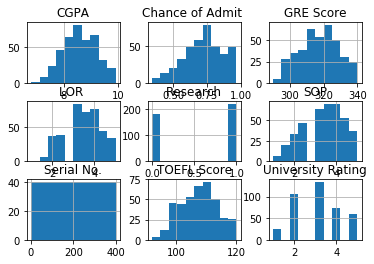

In [29]:
# Data Load
# Use graduate-admissions dataset
df = pd.read_csv('Admission_Predict.csv',sep=',')
df.describe()
df.hist()
print(df.isna().sum()) # this dataset is clear

In [30]:
# Split data set into feature and label set
label = df['Chance of Admit ']
data = df.drop(['Chance of Admit '], axis=1)

In [31]:
# Preprocessing Data

# Normalization using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # create scaler
data = scaler.fit_transform(data) # scale data using feature and 'MinMax' method

In [32]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

linear = LinearRegression() # Create Linear regression model

param_linear = {'fit_intercept' : ['True','False'],'normalize' : ['True', 'False'],'n_jobs' : [1,5,10]} # define parameter for finding best parameter

# create GridSearchCV model using linear regression model 
# find best accuracy and parameter using parameter list.
# use cross validation & the number of folds is 10.
linear_R = GridSearchCV(linear, param_linear, scoring='neg_mean_squared_error', cv=10)
linear_R.fit(data,label)
print("Linear Regressor's best param : ", linear_R.best_params_)
print("Linear Regressor's best score : ", linear_R.best_score_)

Linear Regressor's best param :  {'fit_intercept': 'True', 'n_jobs': 1, 'normalize': 'True'}
Linear Regressor's best score :  -0.004291259223446266


In [33]:
# Ridge regularized regression 
from sklearn.linear_model import Ridge

ridge = Ridge() # Create Ridge model
param_ridge = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]} # define parameter for finding best parameter

# create GridSearchCV model using ridge model 
# find best accuracy and parameter using parameter list.
# use cross validation & the number of folds is 10.
ridge_R= GridSearchCV(ridge, param_ridge, scoring='mean_squared_error',cv=10)  
ridge_R.fit(data,label) # training and test data. (10 folds)
print("Ridge Regressor's best param :",ridge_R.best_params_) # best parameters with the highest score
print("Ridge Regressor's best score :",ridge_R.best_score_)

Ridge Regressor's best param : {'alpha': 0.01}
Ridge Regressor's best score : -0.004290804866515682


In [34]:
# Lasso regularized regression
from sklearn.linear_model import Lasso

lasso = Lasso() # Create Lasso model

param_lasso = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]} # define parameter for finding best parameter

# create GridSearchCV model using lasso model
# find best accuracy and parameter using parameter list.
# use cross validation & the number of folds is 10.
lasso_R = GridSearchCV(lasso, param_lasso, scoring='neg_mean_squared_error', cv=10)
lasso_R.fit(data,label) # training and test data. (10 folds)

print("Lasso Regressor's best param :",lasso_R.best_params_) # best parameters with the highest score
print("Lasso Regressor's best score :",lasso_R.best_score_)

Lasso Regressor's best param : {'alpha': 0.0001}
Lasso Regressor's best score : -0.0042899504682848595


In [35]:
# Elastic Net Regression
from sklearn.linear_model import ElasticNet

elastic = ElasticNet() # Create ElasticNet model

param_elastic = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]} # define parameter for finding best parameter

# create GridSearchCV model using elasticNet model
# find best accuracy and parameter using parameter list.
# use cross validation & the number of folds is 10.
elastic_R = GridSearchCV(elastic, param_elastic, scoring='neg_mean_squared_error', cv=10)
elastic_R.fit(data,label)
print("Elastic Regressor's best param :",elastic_R.best_params_) # best parameters with the highest score
print("Elastic Regressor's best score :",elastic_R.best_score_)

Elastic Regressor's best param : {'alpha': 0.0001}
Elastic Regressor's best score : -0.004289013309419086


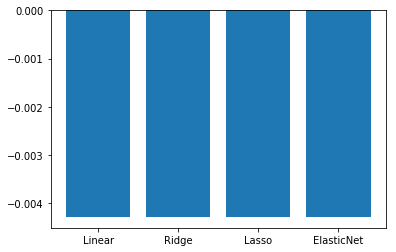

In [36]:
# Compare accuracy between models
import matplotlib.pyplot as plt

models = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']
accu_list = []
accu_list.append(linear_R.best_score_)
accu_list.append(ridge_R.best_score_)
accu_list.append(lasso_R.best_score_)
accu_list.append(elastic_R.best_score_)

plt.bar(models, accu_list)
plt.show()